In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = data.load_data()

In [10]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Tested Acc:", test_acc)

Epoch 1/5
60000/60000 [==============================] - 15s 256us/sample - loss: 0.4972 - acc: 0.8254
Epoch 2/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.3764 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.3377 - acc: 0.8768
Epoch 4/5
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3114 - acc: 0.8859
Epoch 5/5
10000/10000 [==============================] - 1s 132us/sample - loss: 0.3414 - acc: 0.8792
Tested Acc: 0.8792


### keras model.fit()
- model.fit(X, Y, batch_size=100, epochs=10)

  X : 입력 데이터,
  Y : 결과(Label 값) 데이터,
  batch_size : 한 번에 학습할 때 사용하는 데이터 개수,
  epochs : 학습 데이터 반복 횟수
- batch_size: 학습할 때 문제를 몇 번 풀고 정답을 확인하는 지를 결정하는 값. 
  만약 batch_size가 10이라면, 총 10개의 데이터를 학습한 다음 가중치를 1번 갱신.
  100문제를 풀고 가중치를 갱신하는 것과, 1문제를 풀고 가중치를 갱신하는 것은 학습 
  결과에 큰 차이가 있습니다. 사람이 문제집으로 공부를 하는 것과 비슷합니다. 
  100문제를 풀고 한 번에 채점하면서 학습하는 것과, 1문제를 풀고 채점한 다음 다음 
  문제를 푸는 것과 비슷합니다.
* batch_size 값이 크면 클수록 여러 데이터를 기억하고 있어야 하기에 메모리가 커야 
  합니다. 그대신 학습 시간이 빨라집니다. batch_size 값이 작으면 학습은 꼼꼼하게 
  이루어질 수 있지만 학습 시간이 많이 걸립니다.
- epochs: 학습 데이터 전체셋을 몇 번 학습하는지를 의미합니다. 동일한 학습 데이터라고 
  하더라도 여러 번 학습할 수록 학습 효과는 커집니다. 하지만, 너무 많이 했을 경우 
  모델의 가중치가 학습 데이터에 지나치게 최적화되는 과적합(Overfitting) 현상이 발생
  합니다.
  다양한 학습 데이터를 이용해서 학습하는 것이 제일 좋지만, 현실적으로 학습 데이터를 
  다량으로 획득하는 것이 어렵기 떄문에 동일 데이터를 반복해서 학습하는 것은 피하기 
  어렵습니다. 따라서 과적합이 발생하지 않는 적절한 학습 횟수를 찾는 것도 딥러닝이 
  가진 숙제 중 하나입니다.

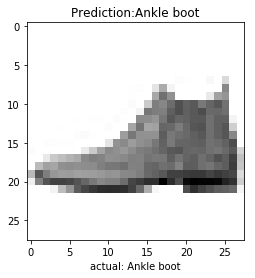

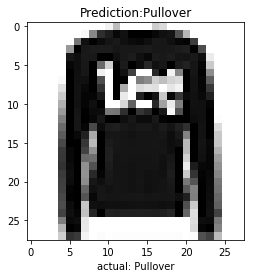

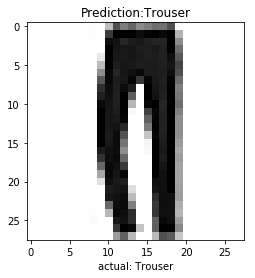

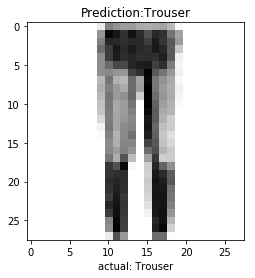

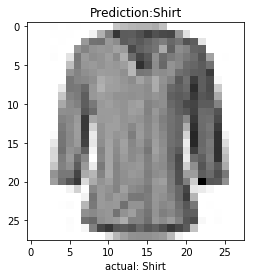

In [15]:
prediction = model.predict(test_images)

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("actual: " + class_names[test_labels[i]])
    plt.title("Prediction:" + class_names[np.argmax(prediction[i])])
    plt.show()

In [23]:
np.version.version

'1.16.2'

# to be continued with text processing (IMDB dataset)

https://www.youtube.com/watch?v=6g4O5UOH304